In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


#Imported All The neccecssary Library

In [2]:
pwd

'C:\\Users\\HP'

In [3]:
df=pd.read_csv(r'C:\\Users\\HP\Documents\accident data.csv')

df.info()

#reading our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

with the look on how the non-null values looks,
there is missing values Present In the dataset. ✔

In [4]:
#let view the Data
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [5]:
#table information

print('The Dataset is compose of :'+str(df.shape))

The Dataset is compose of :(660679, 14)


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Index,660679,421020,2.01E+12,239478
Accident_Severity,660679,3,Slight,563801
Accident Date,660679,1461,30-11-2019,704
Light_Conditions,660679,5,Daylight,484880
District Area,660679,422,Birmingham,13491
Road_Surface_Conditions,659953,5,Dry,447821
Road_Type,656159,5,Single carriageway,492143
Urban_or_Rural_Area,660664,3,Urban,421663
Weather_Conditions,646551,8,Fine no high winds,520885
Vehicle_Type,660679,16,Car,497992


**Observation:**

====> The type of Vechicle on the roaad are 16 types of Vechiles.

====> The datset cover Area are 3.

====> The major road condition are 5.

====> and The District Area is about 422 distrinct area.

**Data Saniy Checck ✔**

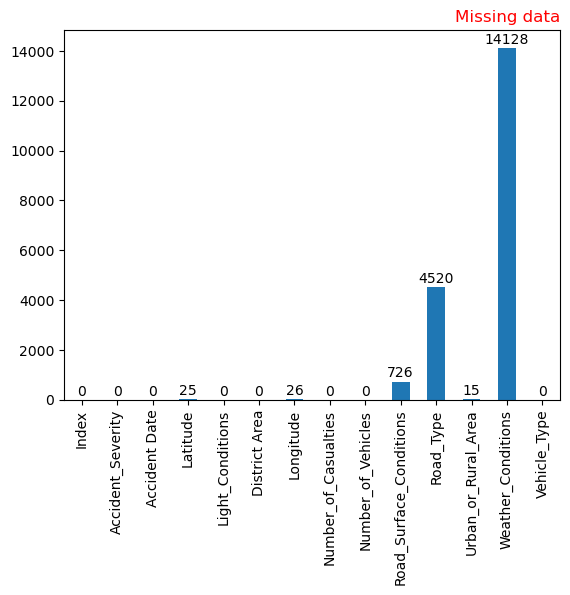

In [7]:
fig=df.isnull().sum().plot.bar()
plt.title('Missing data',c='r',loc='right')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)

**Observeation**
   This Is tellling us that we have in dataset, we gat missing data 
    the bar chart is showing us the columns that we have missing data.

In [8]:
#let show case the area where we gat our missng data?

df[df.isnull().any(axis=1)]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
819,200701CP00136,Slight,16-05-2019,51.509835,Daylight,City of London,-0.087020,1,1,Wet or damp,NaN,Urban,Raining no high winds,Motorcycle 125cc and under
856,200701CP00174,Slight,09-07-2019,51.519394,Daylight,City of London,-0.099736,1,2,Wet or damp,Single carriageway,Urban,NaN,Car
867,200701CP00185,Serious,06-07-2019,51.519150,Daylight,City of London,-0.101332,1,1,Dry,Single carriageway,Urban,NaN,Bus or coach (17 or more pass seats)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660526,201091NJ02165,Slight,13-02-2022,58.590757,Daylight,Highland,-3.517251,1,1,Wet or damp,NaN,Rural,Fine no high winds,Car
660570,201091NJ11888,Slight,27-08-2022,58.592934,Daylight,Highland,-3.523024,1,1,Dry,NaN,Rural,Fine no high winds,Taxi/Private hire car
660572,201091NJ12948,Serious,16-09-2022,58.154625,Daylight,Highland,-5.245331,1,1,Wet or damp,NaN,Rural,Raining + high winds,Car
660623,201091NK05608,Slight,05-11-2022,58.984499,Darkness - lights lit,Orkney Islands,-2.957903,2,1,Wet or damp,NaN,Rural,Fine no high winds,Car


The total Sum of 17883 Missing Data.


for data Accuracy in our analysis, we drop the MissinG data.

In [9]:
#let drop All the missing data

df=df.dropna()

In [10]:
#let confirm?

df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [11]:
#Now Let check the new Look of our data?

df.shape

(642796, 14)

In [12]:
df['Vehicle_Type'].unique()

array(['Car', 'Bus or coach (17 or more pass seats)',
       'Van / Goods 3.5 tonnes mgw or under',
       'Motorcycle over 125cc and up to 500cc',
       'Goods 7.5 tonnes mgw and over', 'Motorcycle 125cc and under',
       'Taxi/Private hire car', 'Motorcycle over 500cc', 'Other vehicle',
       'Motorcycle 50cc and under', 'Minibus (8 - 16 passenger seats)',
       'Goods over 3.5t. and under 7.5t', 'Pedal cycle',
       'Agricultural vehicle', 'Ridden horse',
       'Data missing or out of range'], dtype=object)

In [13]:
#we gat unecessary values in the vechile_type columns which is Data Missing Or out of Range the data is insignificiant
#so we have to droppp it.

df[df['Vehicle_Type']=='Data missing or out of range']

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
228845,2.01E+12,Slight,07-10-2020,54.940534,Daylight,Gateshead,-1.581162,2,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Data missing or out of range
229198,2.01E+12,Slight,07-03-2020,54.965863,Daylight,Gateshead,-1.604015,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Data missing or out of range
238933,2.01E+12,Slight,25-10-2020,53.779533,Daylight,Leeds,-1.553048,2,2,Wet or damp,Single carriageway,Urban,Fine + high winds,Data missing or out of range
238946,2.01E+12,Slight,24-10-2020,53.774900,Daylight,Bradford,-1.802100,1,1,Dry,Single carriageway,Urban,Fine no high winds,Data missing or out of range
239855,2.01E+12,Slight,09-12-2020,53.884421,Darkness - lights lit,Leeds,-1.733123,2,2,Frost or ice,Single carriageway,Urban,Fine no high winds,Data missing or out of range


In [15]:
#we dropping such row.

data=df[df['Vehicle_Type']!='Data missing or out of range']

In [16]:
#we given our data another loook.

data.shape

(642791, 14)

So Presently We working with 642791 rows and  still 14 columns

**Data Format**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642791 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    642791 non-null  object 
 1   Accident_Severity        642791 non-null  object 
 2   Accident Date            642791 non-null  object 
 3   Latitude                 642791 non-null  float64
 4   Light_Conditions         642791 non-null  object 
 5   District Area            642791 non-null  object 
 6   Longitude                642791 non-null  float64
 7   Number_of_Casualties     642791 non-null  int64  
 8   Number_of_Vehicles       642791 non-null  int64  
 9   Road_Surface_Conditions  642791 non-null  object 
 10  Road_Type                642791 non-null  object 
 11  Urban_or_Rural_Area      642791 non-null  object 
 12  Weather_Conditions       642791 non-null  object 
 13  Vehicle_Type             642791 non-null  object 
dtypes: f

In [18]:
data.sample(3)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
284035,200837L015944,Slight,13-08-2020,52.482695,Daylight,Waveney,1.749048,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car
266313,200830D000347,Slight,03-05-2020,52.918646,Darkness - lights lit,Derby,-1.423050,1,1,Dry,Roundabout,Urban,Fine no high winds,Taxi/Private hire car
523001,201001JI40126,Slight,12-03-2022,51.593277,Darkness - lighting unknown,Redbridge,0.036462,3,2,Dry,Roundabout,Urban,Fine no high winds,Motorcycle over 500cc


In [19]:
#we have some work cleanng do be done here

data['Accident Date']=pd.to_datetime(data['Accident Date'],errors='coerce')

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-08-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-09-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-10-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-10-2019' in DD/MM/YYYY format. Provide format or specify infer_date

In [21]:
#confirming The Data Type

type(data['Accident Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Done ✔✔

Text(1.0, 1.0, 'the Data types')

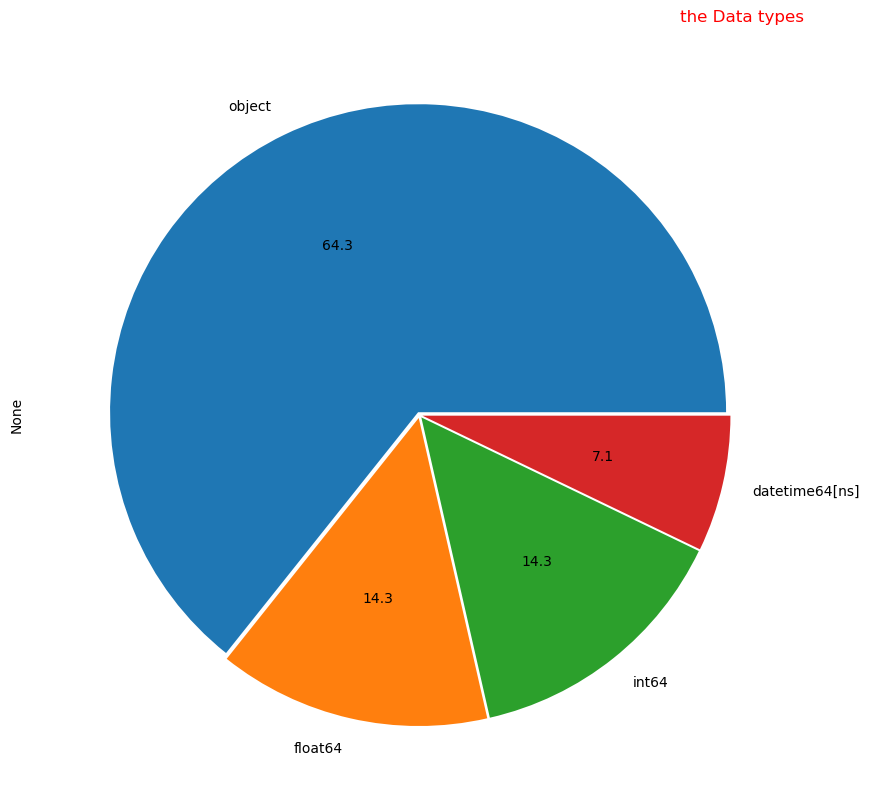

In [22]:
fig=data.dtypes.value_counts().plot.pie(figsize=(10,10),explode=(0.01,0.01,0.01,0.01),autopct='%1.1f')
plt.title('the Data types',loc='right',c='r')

In [20]:
data['Longitude']=df['Longitude'].abs()

In [23]:
data.sample(2)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
598328,201032C262710,Slight,2022-03-09,53.165125,Daylight,East Lindsey,0.088274,3,2,Dry,Single carriageway,Rural,Fine no high winds,Car
78410,2.01E+12,Slight,2019-05-13,52.620113,Daylight,Lichfield,-1.730537,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car


In [24]:
col_df=data.describe(include='object').columns

In [25]:
for i in col_df:
    print("Unique Values  in ", i , "are : \n",format(data[i].value_counts()))
    print("*"*50)

Unique Values  in  Index are : 
 2.01E+12         232083
2.01E+292             4
2.01E+260             4
2.01E+197             4
2.01E+199             4
                  ...  
200804CA08006         1
200804CA08005         1
200804CA08004         1
200804CA08003         1
201091NM02142         1
Name: Index, Length: 410527, dtype: int64
**************************************************
Unique Values  in  Accident_Severity are : 
 Slight     547716
Serious     86551
Fatal        8524
Name: Accident_Severity, dtype: int64
**************************************************
Unique Values  in  Light_Conditions are : 
 Daylight                       471919
Darkness - lights lit          126766
Darkness - no lighting          36868
Darkness - lighting unknown      4766
Darkness - lights unlit          2472
Name: Light_Conditions, dtype: int64
**************************************************
Unique Values  in  District Area are : 
 Birmingham          12980
Leeds                8783
Manches

**Features Engineering:**

In [26]:
data['Accident Year']=pd.DatetimeIndex(data['Accident Date']).year
data['Accident_Month']=pd.DatetimeIndex(data['Accident Date']).month_name()

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\4000480771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accident Year']=pd.DatetimeIndex(data['Accident Date']).year
C:\Users\HP\AppData\Local\Temp\ipykernel_19228\4000480771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accident_Month']=pd.DatetimeIndex(data['Accident Date']).month_name()


In [27]:
data.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident Year,Accident_Month
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,May
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,February
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,August
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,September
6,200701BS67207,Serious,2019-05-09,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,May


**Explorative Data Analysis..**

In [28]:
# let Get The Total Number Of Causaulities

print('Total Number of causaulities :' ,format(data['Number_of_Casualties'].sum()))

Total Number of causaulities : 874422


In [29]:
#NOw Let filter By Year?

print('This Dataset is Made up of how many Year many years of Accident ? ',format(data['Accident Year'].unique()))

This Dataset is Made up of how many Year many years of Accident ?  [2019 2020 2021 2022]


In [30]:
two_2019_df=data[data['Accident Year']==2019]

two_2019_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident Year,Accident_Month
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,May
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,February
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,August
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,September
6,200701BS67207,Serious,2019-05-09,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182110,2.01E+12,Slight,2019-12-20,54.985289,Darkness - no lighting,Dumfries and Galloway,-3.210294,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,December
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,December
182112,2.01E+12,Slight,2019-12-23,55.166369,Darkness - no lighting,Dumfries and Galloway,-2.992068,1,1,Frost or ice,Single carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2019,December
182113,2.01E+12,Slight,2019-12-23,54.995154,Darkness - lights lit,Dumfries and Galloway,-3.058338,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019,December


In [31]:
print("The total Number of Causualities in 2019 : ",format(two_2019_df['Number_of_Casualties'].sum()))
print("The total Number of Vechiles Causualities in 2019 : ",format(two_2019_df['Number_of_Vehicles'].sum()))

The total Number of Causualities in 2019 :  241177
The total Number of Vechiles Causualities in 2019 :  325345


In [32]:
#Let do for the year 2020

two_2020_df=data[data['Accident Year']==2020]

print("The total Number of Causualities in 2020 : ",format(two_2020_df['Number_of_Casualties'].sum()))
print("The total Number of Vechiles Causualities in 20202 : ",format(two_2020_df['Number_of_Vehicles'].sum()))


print("*"*70)

#Let do for the year 2021

two_2021_df=data[data['Accident Year']==2021]

print("The total Number of Causualities in 2021 : ",format(two_2021_df['Number_of_Casualties'].sum()))
print("The total Number of Vechiles Causualities in 2021 : ",format(two_2021_df['Number_of_Vehicles'].sum()))


print("*"*70)

#Let do for the year 2020

two_2022_df=data[data['Accident Year']==2022]

print("The total Number of Causualities in 2022 : ",format(two_2022_df['Number_of_Casualties'].sum()))
print("The total Number of Vechiles Causualities in 2022 : ",format(two_2022_df['Number_of_Vehicles'].sum()))

The total Number of Causualities in 2020 :  224716
The total Number of Vechiles Causualities in 20202 :  302734
**********************************************************************
The total Number of Causualities in 2021 :  216848
The total Number of Vechiles Causualities in 2021 :  291165
**********************************************************************
The total Number of Causualities in 2022 :  191681
The total Number of Vechiles Causualities in 2022 :  258926


**Observation**

    The trend of the Data is, Yearly causualitites Cases Happen,and Ever Since the 2019 where we Recorded The Highest causualities,
    the Year After Year There have been cutdown in figures of the Causualitites that Happen yearly.
    
    The Case of 2019 to 2022.
    there Have Beeen Improvement in the Causualitities cases
    
    
    Let Take a Look At The Each Year Improvment On The Cases.

In [33]:
#YOY 

yoy=(two_2022_df['Number_of_Casualties'].sum()-two_2021_df['Number_of_Casualties'].sum())/two_2021_df['Number_of_Casualties'].sum()

print('The YOY % of the Causualities Differences between 2021 to 2022: ',format(yoy))

print("*"*65)

yoy_=(two_2021_df['Number_of_Casualties'].sum()-two_2020_df['Number_of_Casualties'].sum())/two_2020_df['Number_of_Casualties'].sum()

print('The YOY % of the Causualities Differences between 2021 to 2020: ',format(yoy_))


print("*"*65)

Yoy=(two_2020_df['Number_of_Casualties'].sum()-two_2019_df['Number_of_Casualties'].sum())/two_2019_df['Number_of_Casualties'].sum()

print('The YOY % of the Causualities Differences between 2020 to 2019 : ',format(Yoy))

The YOY % of the Causualities Differences between 2021 to 2022:  -0.11605825278536118
*****************************************************************
The YOY % of the Causualities Differences between 2021 to 2020:  -0.03501308318054789
*****************************************************************
The YOY % of the Causualities Differences between 2020 to 2019 :  -0.06825277700609926


**Observation:**
    
    The Lowest Causualitites Differences cases happen between 2021 to 2022 is -0.116
    While The Highest Causualities Differences Cases Happen between 2019 to 2020 is 0.06

In [34]:
data.head(3)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident Year,Accident_Month
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,May
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,February
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,August


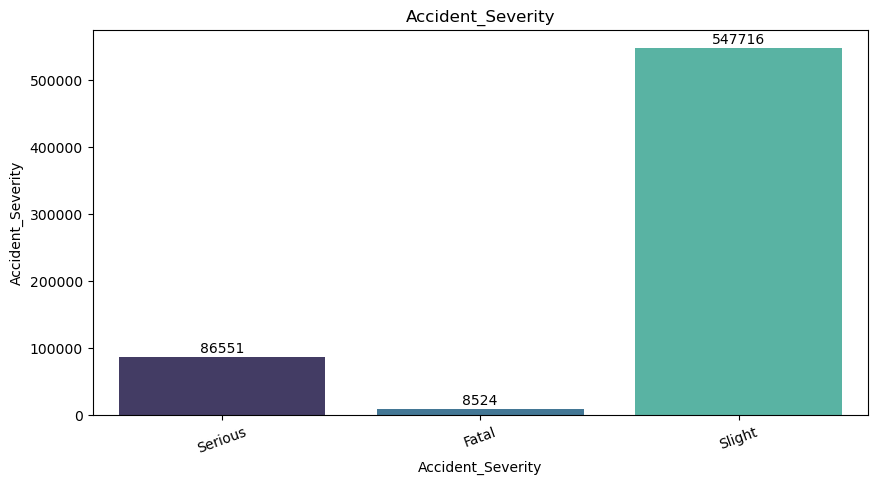

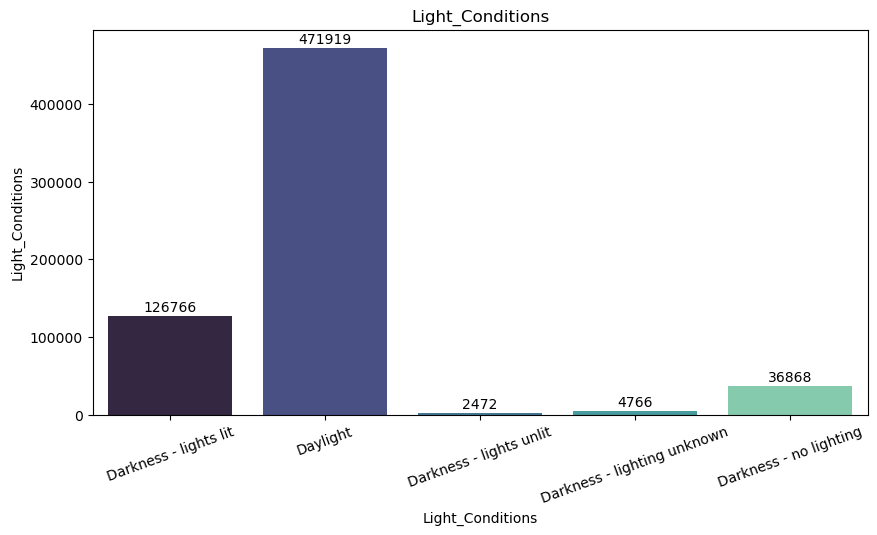

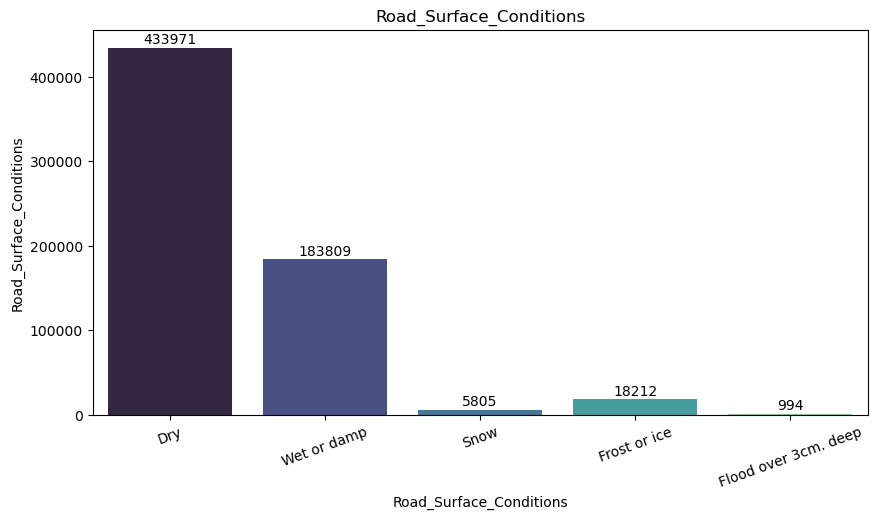

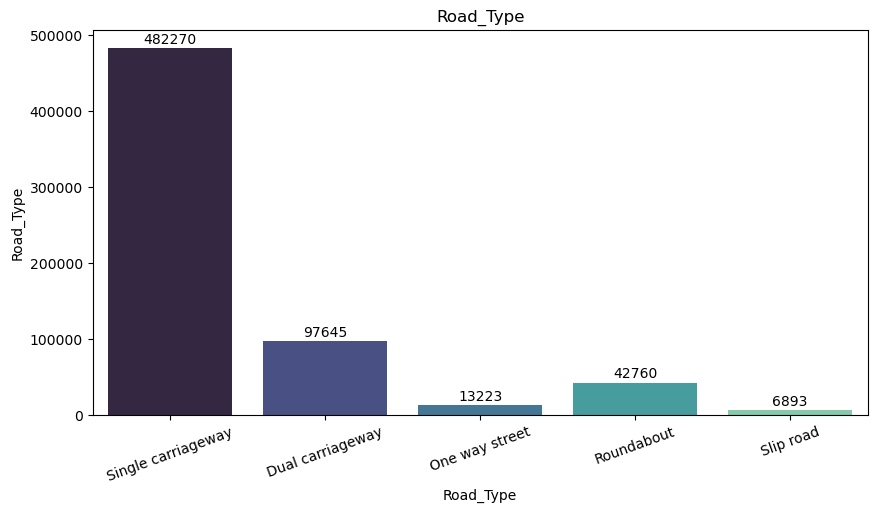

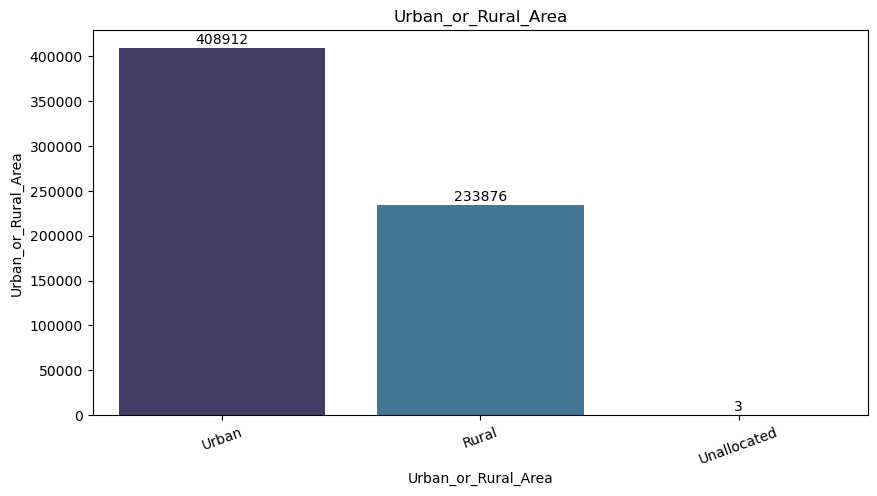

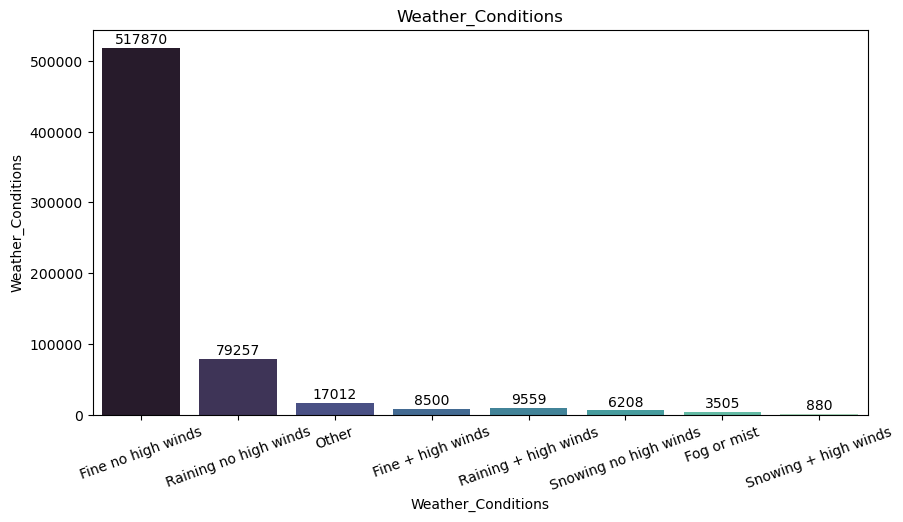

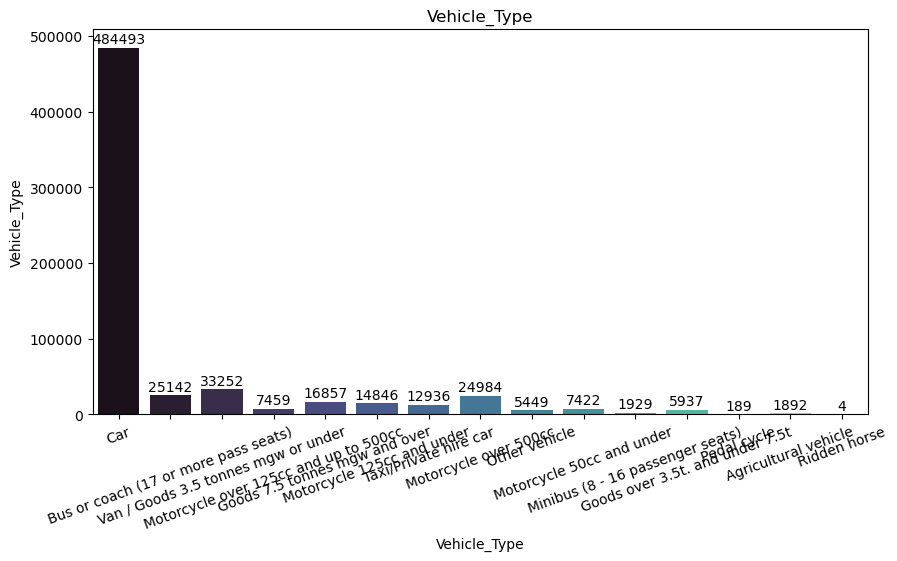

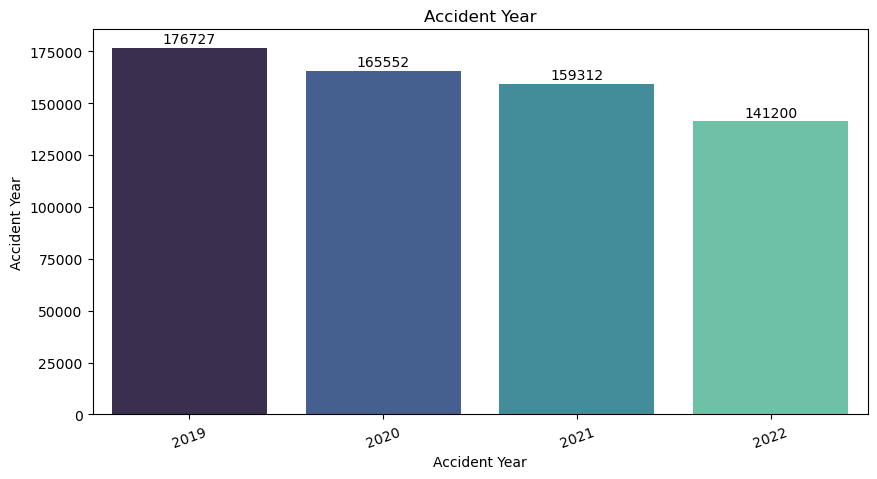

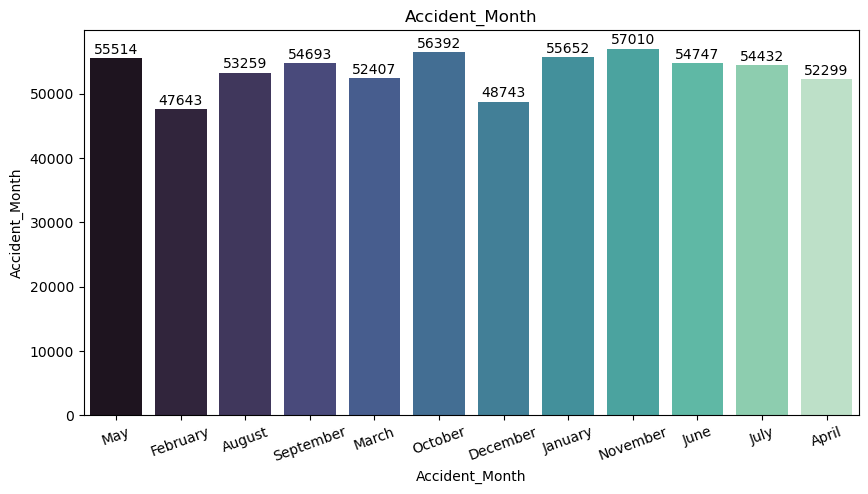

In [36]:
for i,col in enumerate(data.drop(columns=['Index','Accident Date','Latitude','Longitude','District Area','Number_of_Vehicles','Number_of_Casualties'],axis=1)):
    plt.figure(figsize=(10,5))
    fig=sns.countplot(data=data,x=col,palette='mako')
    plt.title(col)
    plt.ylabel(col)
    plt.xticks(rotation=20)
    
    for container in fig.containers:
        fig.bar_label(container,label_type='edge',padding=1)

Observation:
    
    
    Novermber Seems to be the Year Accident Happen the Most. About 57010 Accident was recoorded in Novermber from 2019 to 2022.
    followed by October which record accidental cases of 56384, the Conclusion should have beeen that every Last quater of the year
    the accident cases are much but when you take a Look At The december cases the cases are low.
    
    Has it is Know 2019 is the most Frequent Cases
    
    Out of all of means of transportation mention,Car Accident is the happen Case of All.
    
    Woah, Teh Amjjority Of the Accidental cases Happen In The Dry season What might be the cause of it???
    
    majorly happen in UrBAN Area infact most og this accident happen in broad day Light.
    
    From 2019 - 2022, The Fatal Accident are scarty, 
    the Serious Accident wer few while the Slight Accident are the Majority Of the Accident.

In [37]:
data.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident Year,Accident_Month
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,May
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,February
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,August
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,September
6,200701BS67207,Serious,2019-05-09,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,May


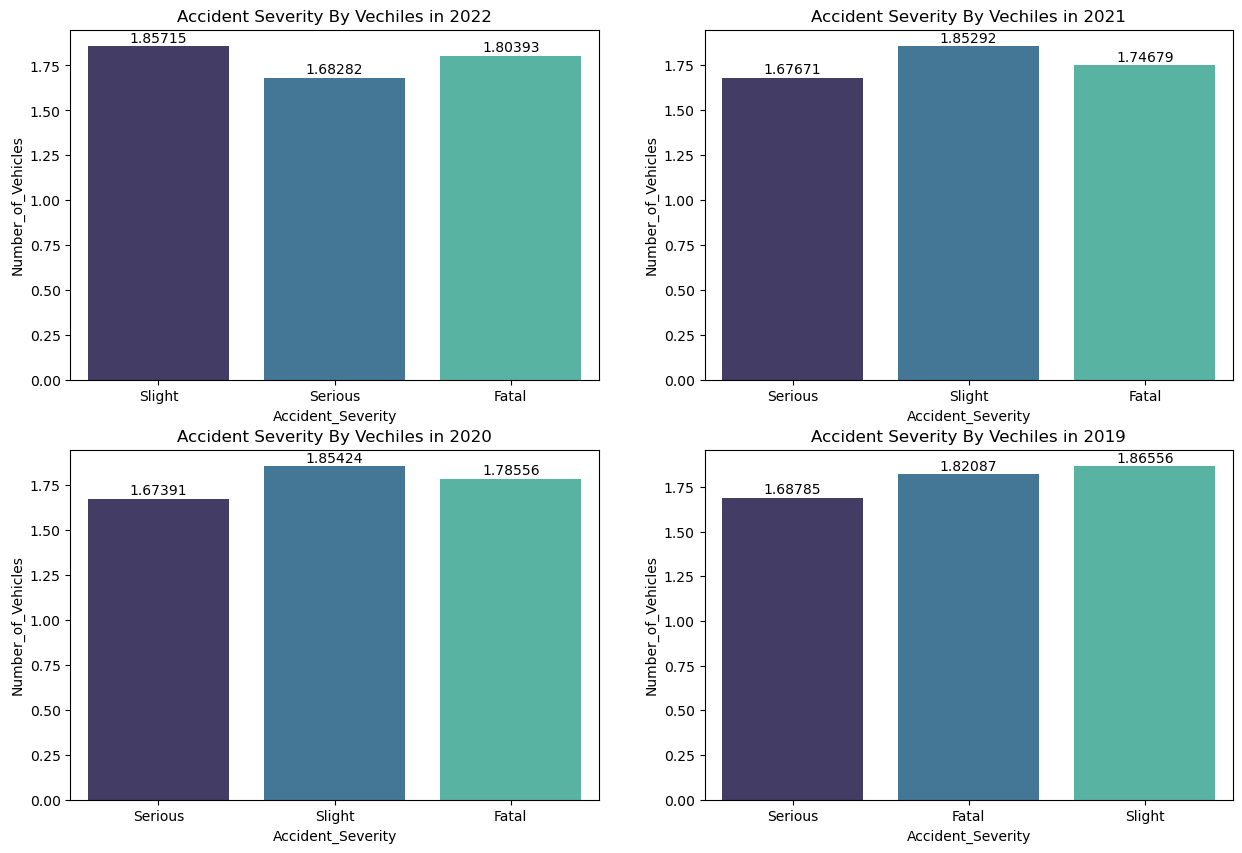

In [38]:
fig,ax=plt.subplots(2,2, figsize=(15,10))
f=sns.barplot(data=two_2022_df,x=two_2022_df['Accident_Severity'],y=two_2022_df['Number_of_Vehicles'],palette='mako',ax=ax[0,0],ci=None)
ax[0,0].set_title('Accident Severity By Vechiles in 2022',)
fi=sns.barplot(data=two_2021_df,x=two_2021_df['Accident_Severity'],y=two_2021_df['Number_of_Vehicles'],palette='mako',ax=ax[0,1],ci=None)
ax[0,1].set_title('Accident Severity By Vechiles in 2021')
fg=sns.barplot(data=two_2020_df,x=two_2020_df['Accident_Severity'],y=two_2020_df['Number_of_Vehicles'],palette='mako',ax=ax[1,0],ci=None)
ax[1,0].set_title('Accident Severity By Vechiles in 2020')
fig=sns.barplot(data=two_2019_df,x=two_2019_df['Accident_Severity'],y=two_2019_df['Number_of_Vehicles'],palette='mako',ax=ax[1,1],ci=None)
ax[1,1].set_title('Accident Severity By Vechiles in 2019')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)
    
for container in fg.containers:
    fg.bar_label(container,label_type='edge',padding=1)
    
for container in fi.containers:
    fi.bar_label(container,label_type='edge',padding=1)
for container in f.containers:
    f.bar_label(container,label_type='edge',padding=1)

**Observation:**:

=> With The look of Thing,as we All konw that the Slight cases is The most cases in The Accident That happen the Most?
while the serious aciident cases take The Second Place But We The look of thing the from 2019 to 2022.Fatal Accident record More In each Years Than the Serious accident While The Overall (2019 -2022) serious Accident Take The second

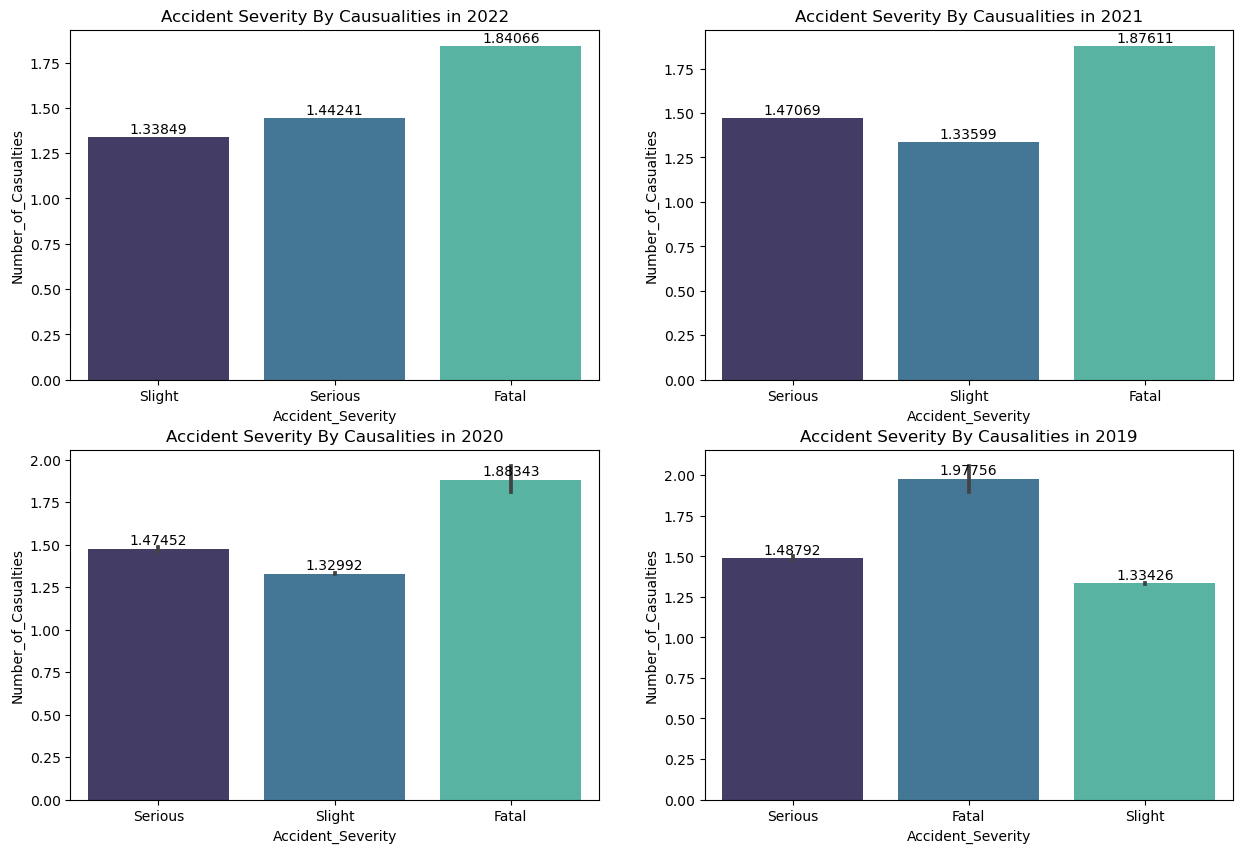

In [39]:
fig,ax=plt.subplots(2,2, figsize=(15,10))
f=sns.barplot(data=two_2022_df,x=two_2022_df['Accident_Severity'],y=two_2022_df['Number_of_Casualties'],palette='mako',ax=ax[0,0],ci=None)
ax[0,0].set_title('Accident Severity By Causualities in 2022')
fi=sns.barplot(data=two_2021_df,x=two_2021_df['Accident_Severity'],y=two_2021_df['Number_of_Casualties'],palette='mako',ax=ax[0,1],ci=None)
ax[0,1].set_title('Accident Severity By Causualities in 2021')
fg=sns.barplot(data=two_2020_df,x=two_2020_df['Accident_Severity'],y=two_2020_df['Number_of_Casualties'],palette='mako',ax=ax[1,0])
ax[1,0].set_title('Accident Severity By Causalities in 2020')
fig=sns.barplot(data=two_2019_df,x=two_2019_df['Accident_Severity'],y=two_2019_df['Number_of_Casualties'],palette='mako',ax=ax[1,1])
ax[1,1].set_title('Accident Severity By Causalities in 2019')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)
    
for container in fg.containers:
    fg.bar_label(container,label_type='edge',padding=1)
    
for container in fi.containers:
    fi.bar_label(container,label_type='edge',padding=1)
for container in f.containers:
    f.bar_label(container,label_type='edge',padding=1)

**Observation:**:

=> With The look of Thing,as we All konw that the Slight cases is The most cases in The Accident That happen the Most?
while the serious aciident cases take The Second Place But We The look of thing the from 2019 to 2022.Fatal Accident record More In each Years Than the Serious accident While The Overall (2019 -2022) serious Accident Take The second

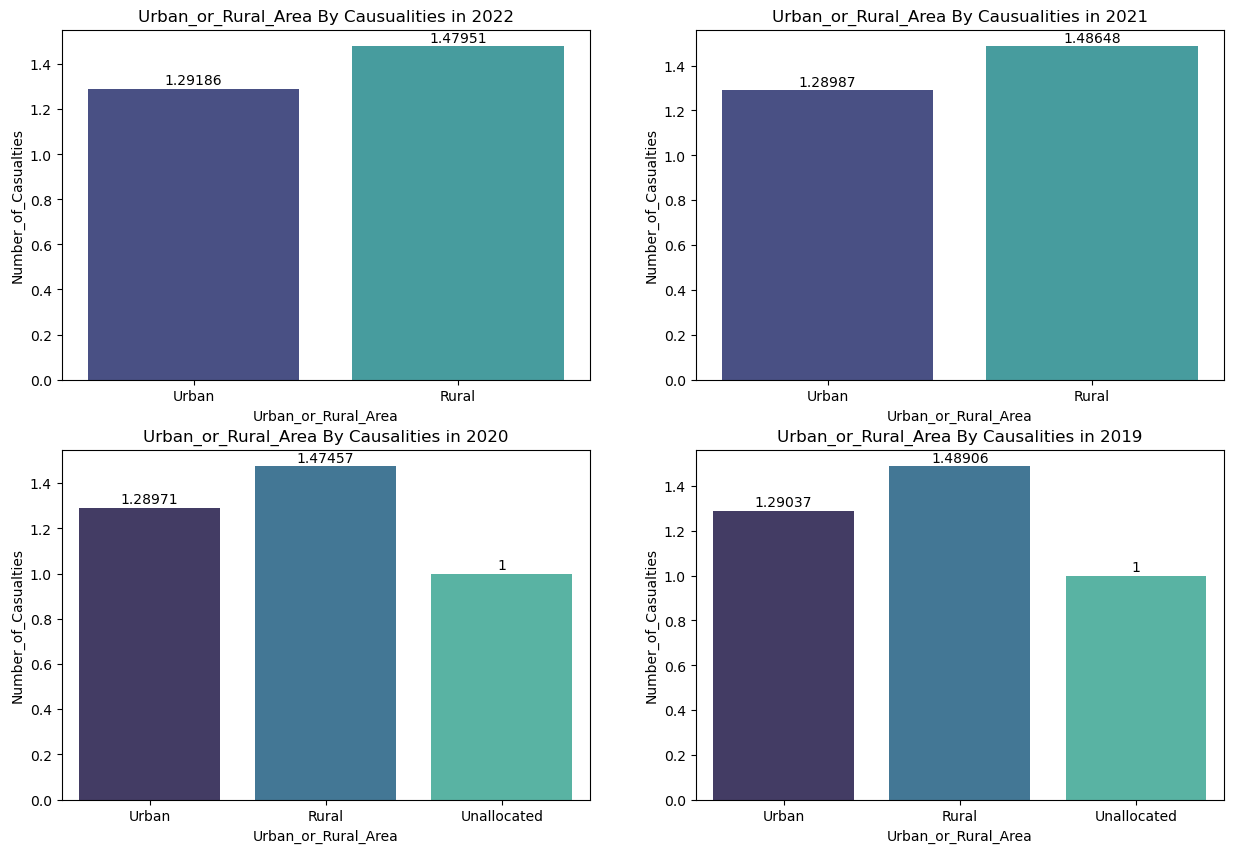

In [86]:
fig,ax=plt.subplots(2,2, figsize=(15,10))
f=sns.barplot(data=two_2022_df,x=two_2022_df['Urban_or_Rural_Area'],y=two_2022_df['Number_of_Casualties'],palette='mako',ax=ax[0,0],ci=None)
ax[0,0].set_title('Urban_or_Rural_Area By Causualities in 2022')
fi=sns.barplot(data=two_2021_df,x=two_2021_df['Urban_or_Rural_Area'],y=two_2021_df['Number_of_Casualties'],palette='mako',ax=ax[0,1],ci=None)
ax[0,1].set_title('Urban_or_Rural_Area By Causualities in 2021')
fg=sns.barplot(data=two_2020_df,x=two_2020_df['Urban_or_Rural_Area'],y=two_2020_df['Number_of_Casualties'],palette='mako',ax=ax[1,0],ci=None)
ax[1,0].set_title('Urban_or_Rural_Area By Causalities in 2020')
fig=sns.barplot(data=two_2019_df,x=two_2019_df['Urban_or_Rural_Area'],y=two_2019_df['Number_of_Casualties'],palette='mako',ax=ax[1,1],ci=None)
ax[1,1].set_title('Urban_or_Rural_Area By Causalities in 2019')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=1)
    
for container in fg.containers:
    fg.bar_label(container,label_type='edge',padding=1)
    
for container in fi.containers:
    fi.bar_label(container,label_type='edge',padding=1)
for container in f.containers:
    f.bar_label(container,label_type='edge',padding=1)

Observation:
    The Accident happen in Urban_or_Rural_Area Which compose of 3 unique identity Urban,rural and unallocated. but unallocated only Happen 
    accident Area only occur in 2020 and 2019.

In [40]:
data.head(3)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Accident Year,Accident_Month
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,May
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,February
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,August


Text(0.5, 1.0, 'Accident_Month By Causalities in 2019')

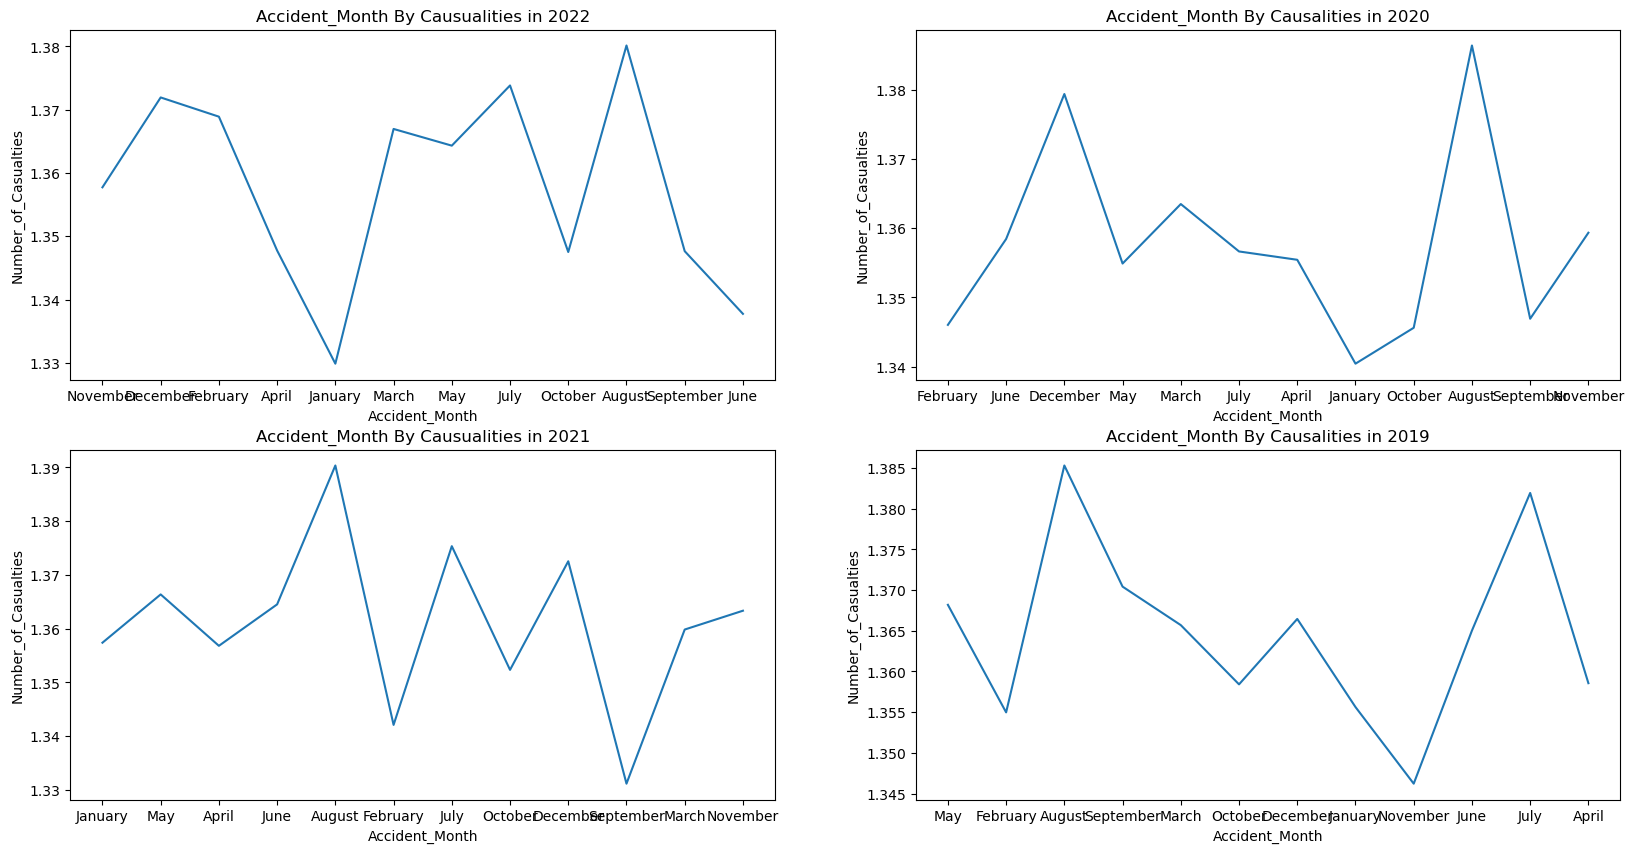

In [51]:
fig,ax=plt.subplots(2,2, figsize=(20,10))
sns.lineplot(data=two_2022_df,x=two_2022_df['Accident_Month'],y=two_2022_df['Number_of_Casualties'],palette='mako',ax=ax[0,0],ci=None)
ax[0,0].set_title('Accident_Month By Causualities in 2022')
sns.lineplot(data=two_2021_df,x=two_2021_df['Accident_Month'],y=two_2021_df['Number_of_Casualties'],palette='mako',ax=ax[1,0],ci=None)
ax[1,0].set_title('Accident_Month By Causualities in 2021')
sns.lineplot(data=two_2020_df,x=two_2020_df['Accident_Month'],y=two_2020_df['Number_of_Casualties'],palette='mako',ax=ax[0,1],ci=None)
ax[0,1].set_title('Accident_Month By Causalities in 2020')
sns.lineplot(data=two_2019_df,x=two_2019_df['Accident_Month'],y=two_2019_df['Number_of_Casualties'],palette='mako',ax=ax[1,1],ci=None)
ax[1,1].set_title('Accident_Month By Causalities in 2019')

Insight:
    The Month Accident case happen the Most from 2019 to 2022 is **August.**

In [45]:
data['Vehicle_Type'].unique()

array(['Car', 'Bus or coach (17 or more pass seats)',
       'Van / Goods 3.5 tonnes mgw or under',
       'Motorcycle over 125cc and up to 500cc',
       'Goods 7.5 tonnes mgw and over', 'Motorcycle 125cc and under',
       'Taxi/Private hire car', 'Motorcycle over 500cc', 'Other vehicle',
       'Motorcycle 50cc and under', 'Minibus (8 - 16 passenger seats)',
       'Goods over 3.5t. and under 7.5t', 'Pedal cycle',
       'Agricultural vehicle', 'Ridden horse'], dtype=object)

Text(0.5, 1.0, 'Vehicle_Type By Number_of_Vehicles in 2019')

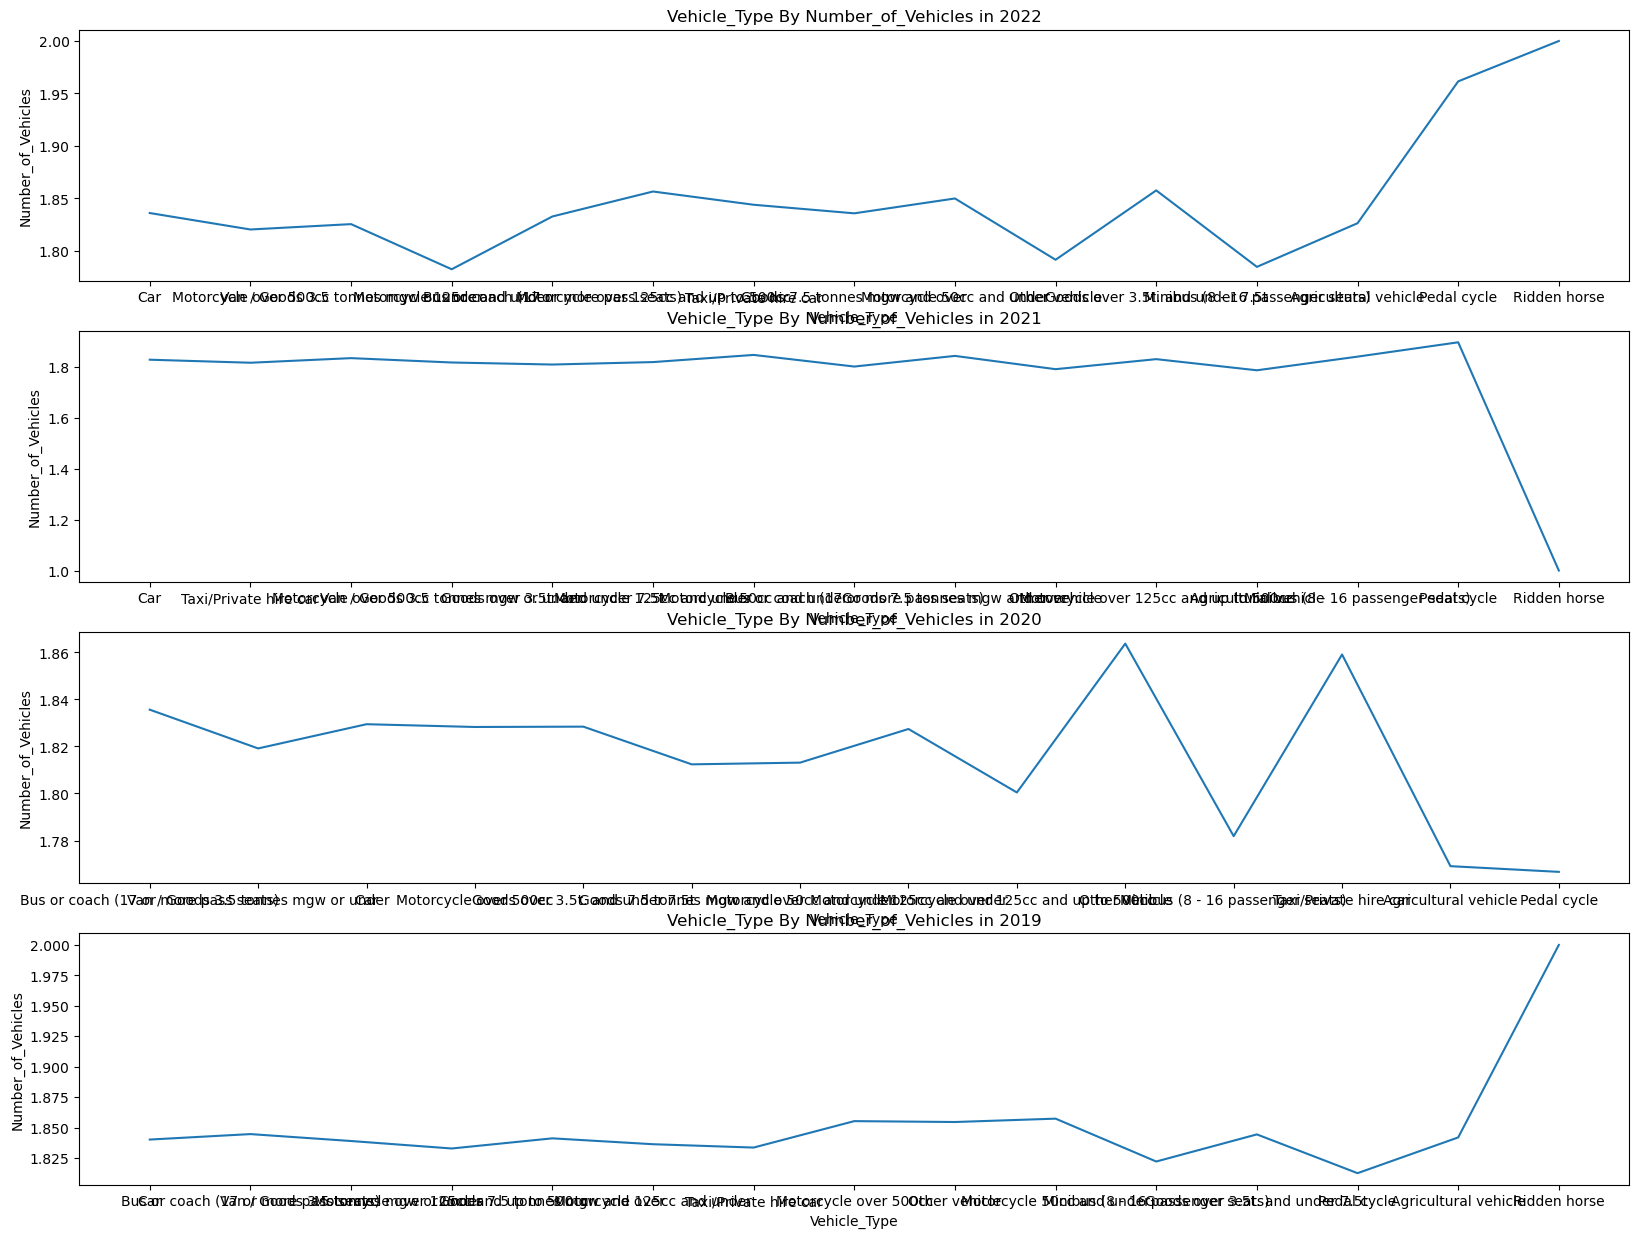

In [54]:
fig,ax=plt.subplots(4,1, figsize=(20,15))
sns.lineplot(data=two_2022_df,x=two_2022_df['Vehicle_Type'],y=two_2022_df['Number_of_Vehicles'],palette='mako',ax=ax[0],ci=None)
ax[0].set_title('Vehicle_Type By Number_of_Vehicles in 2022')
sns.lineplot(data=two_2021_df,x=two_2021_df['Vehicle_Type'],y=two_2021_df['Number_of_Vehicles'],palette='mako',ax=ax[1],ci=None)
ax[1].set_title('Vehicle_Type By Number_of_Vehicles in 2021')
sns.lineplot(data=two_2020_df,x=two_2020_df['Vehicle_Type'],y=two_2020_df['Number_of_Vehicles'],palette='mako',ax=ax[2],ci=None)
ax[2].set_title('Vehicle_Type By Number_of_Vehicles in 2020')
sns.lineplot(data=two_2019_df,x=two_2019_df['Vehicle_Type'],y=two_2019_df['Number_of_Vehicles'],palette='mako',ax=ax[3],ci=None)
ax[3].set_title('Vehicle_Type By Number_of_Vehicles in 2019')

Text(0.5, 1.0, 'Road_Surface_Conditions By Causalities in 2019')

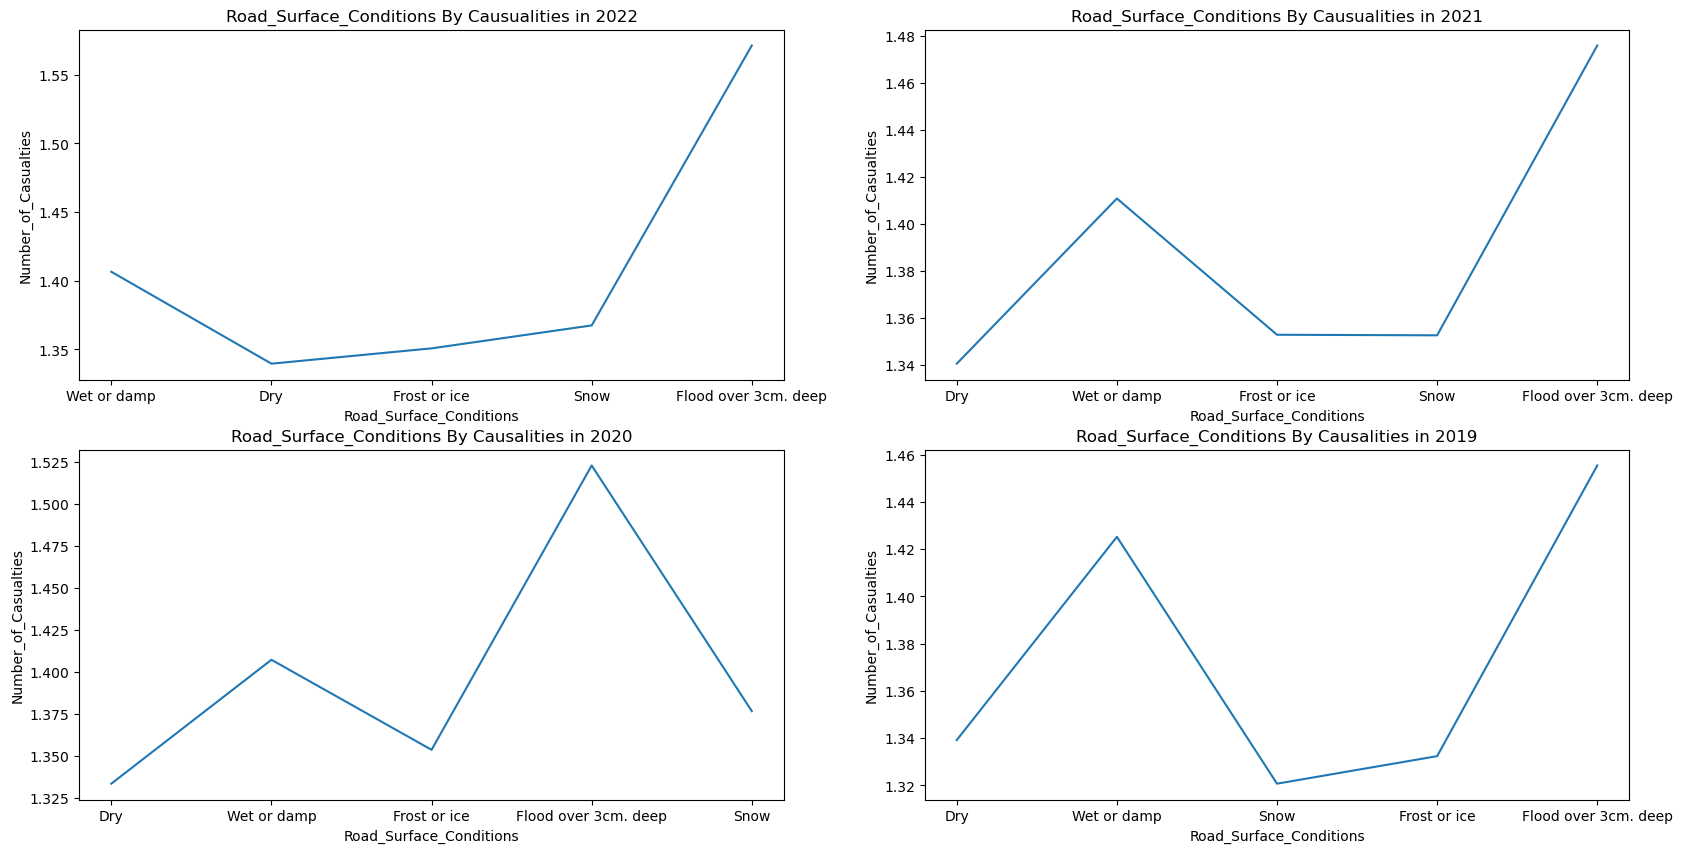

In [55]:
fig,ax=plt.subplots(2,2, figsize=(20,10))
sns.lineplot(data=two_2022_df,x=two_2022_df['Road_Surface_Conditions'],y=two_2022_df['Number_of_Casualties'],palette='mako',ax=ax[0,0],ci=None)
ax[0,0].set_title('Road_Surface_Conditions By Causualities in 2022')
sns.lineplot(data=two_2021_df,x=two_2021_df['Road_Surface_Conditions'],y=two_2021_df['Number_of_Casualties'],palette='mako',ax=ax[0,1],ci=None)
ax[0,1].set_title('Road_Surface_Conditions By Causualities in 2021')
sns.lineplot(data=two_2020_df,x=two_2020_df['Road_Surface_Conditions'],y=two_2020_df['Number_of_Casualties'],palette='mako',ax=ax[1,0],ci=None)
ax[1,0].set_title('Road_Surface_Conditions By Causalities in 2020')
sns.lineplot(data=two_2019_df,x=two_2019_df['Road_Surface_Conditions'],y=two_2019_df['Number_of_Casualties'],palette='mako',ax=ax[1,1],ci=None)
ax[1,1].set_title('Road_Surface_Conditions By Causalities in 2019')

Insight:
    Flood is The Type of road where Number of causualitites happen that from 2019 - 2022